In [1]:
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline
from scipy.io import loadmat
import decimal
data=loadmat(r'C:\Users\saminens\Desktop\ML\ex5data1')


In [2]:
X=data['X']
y=data['y']
Xval=data['Xval']
yval=data['yval']
Xtest=data['Xtest']
ytest=data['ytest']


Text(0,0.5,'water flowing out of dam')

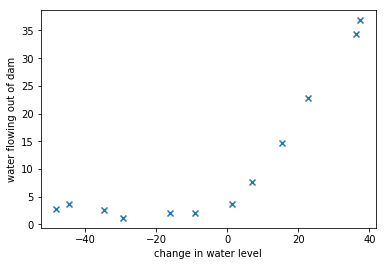

In [3]:
m,n=X.shape
pt.scatter(X,y,marker='x')
pt.xlabel('change in water level')
pt.ylabel('water flowing out of dam')



In [4]:
def reglinearcostfunc(theta,X,y,lamda):
    m=X.shape[0]
    #print(X.shape,theta.shape)
    theta=theta.reshape(-1,1)
    h = X.dot(theta)
    J = 1/(2*m) * np.sum(np.square(h-y))+ (lamda/(2*m)) * np.sum(np.square(theta[1:]))
    a=np.eye(len(theta))
    a[0,0]=0
    grad= 1/m * (X.T.dot(h-y)) + lamda/m * (a.dot(theta))
    return J,grad

In [5]:
t=np.hstack((np.ones((m,1)),X))
theta = np.array([1, 1])
j=reglinearcostfunc(theta,t,y,1)
j

(303.99319222026429, array([[ -15.30301567],
        [ 598.25074417]]))

In [6]:
import  scipy.optimize  as opt
def trainlinearreg(X,y,lamda):
    n=X.shape[1]
    itheta=(np.zeros(n)).reshape(-1,1)
    result=opt.minimize(reglinearcostfunc,itheta,args=(X,y,lamda),method='TNC',jac=True,options={'maxiter':400})
    return result


     fun: 22.373906495108915
     jac: array([[  3.31927226e-10],
       [ -4.60928830e-08]])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 9
     nit: 4
  status: 0
 success: True
       x: array([ 13.08790351,   0.36777923])

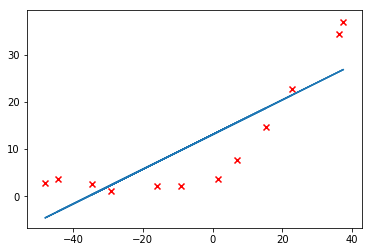

In [7]:
#trained line, linear regression.
result=trainlinearreg(t,y,0)
pt.plot(X,t.dot(result.x))
pt.scatter(X,y,marker='x',c='r')
result

In [31]:
#learning curve for linear regression
def learningcurve(X,y,Xval,yval,lamda):
    m,n=X.shape
    error_train=np.zeros((m,1))
    error_val=np.zeros((m,1))
    for i in range(m):
        a=X[:i+1]
        b=y[:i+1]
        theta=trainlinearreg(a,b,lamda)
        error_train[i],_=reglinearcostfunc(theta.x,a,b,0)
        error_val[i],_=reglinearcostfunc(theta.x,Xval,yval,0)
    return error_train, error_val

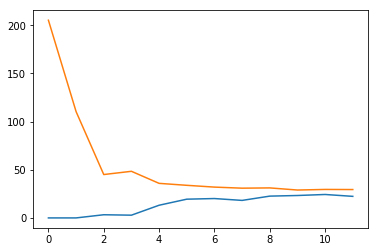

In [32]:
m_v=Xval.shape[0]
m_t=Xtest.shape[0]
j1,j2=learningcurve(t,y,np.hstack((np.ones((m_v,1)),Xval)),yval,0)
pt.plot(range(0,m),j1)
pt.plot(range(0,m),j2)

In [10]:
def featurenormalize(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm,mu,sigma

In [11]:
def polyfeatures(X,p):
    X_poly=np.zeros((len(X),p))
    for i in range (p):
        X_poly[:,i]=np.power(X,i+1).ravel()
    return X_poly

In [44]:
#feature mapping for polynomial regression
X_poly=polyfeatures(X,7)
X_poly,mu,sigma=featurenormalize(X_poly)
X_poly=np.hstack((np.ones((m,1)),X_poly))

X_tpoly=polyfeatures(Xtest,7)
X_tpoly,t_mu,t_sigma=featurenormalize(X_tpoly)
X_tpoly=np.hstack((np.ones((m_t,1)),X_tpoly))

X_vpoly=polyfeatures(Xval,7)
X_vpoly,v_mu,v_sigma=featurenormalize(X_vpoly)
X_vpoly=np.hstack((np.ones((m_v,1)),X_vpoly))


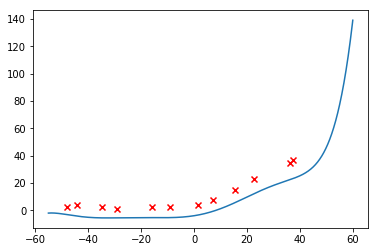

In [45]:
h=np.arange(-55,60,0.05)
theta=trainlinearreg(X_poly,y,0)
x=polyfeatures(h,7)
x,m_u,sig_ma=featurenormalize(x)
x=np.hstack((np.ones((x.shape[0],1)),x))
pt.plot(h,x.dot(theta.x))
pt.scatter(X,y,marker='x',c='r')

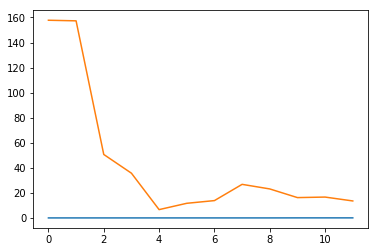

In [46]:
mp_v=X_poly.shape[0]
mp_t=X_vpoly.shape[0]
jp1,jp2=learningcurve(X_poly,y,X_vpoly,yval,0)
pt.plot(range(0,m),jp1)
pt.plot(range(0,m),jp2)
#high variance!!

In [47]:
#lambda validation
def validationcurve(X,y,Xval,yval):
    lambdas=np.linspace(0,5,20)
    error_train=np.zeros((lambdas.shape[0],1))
    error_val=np.zeros((lambdas.shape[0],1))
    m=X.shape[0]
    m_v=Xval.shape[0]
    for i in range(lambdas.shape[0]):
        l=lambdas[i]
        theta=trainlinearreg(X,y,l)
        error_train[i],_=reglinearcostfunc(theta.x,X,y,0)
        error_val[i],_=reglinearcostfunc(theta.x,Xval,yval,0)
    return lambdas,error_train,error_val
        
        

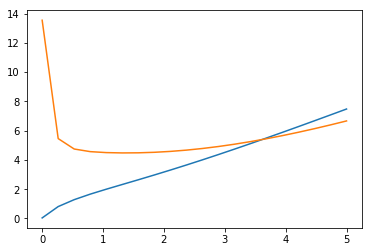

In [48]:
lambdas, error_train, error_val = validationcurve(X_poly, y, X_vpoly, yval)
pt.plot(lambdas,error_train)
pt.plot(lambdas,error_val)
#best lambda is around 3.5